In [1]:
import time
import numpy as np
np.random.seed(0)
import pandas as pd
from gmm import GMM
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from multiprocessing import Pool
from collections import defaultdict
from scipy.stats import multivariate_normal as mvn
from sklearn.model_selection import train_test_split

plt.rcParams["font.size"] = 18
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = 8,6
plt.rcParams['font.serif'] = "Cambria"
plt.rcParams['font.family'] = "serif"

%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv("../datasets/2A/consolidated_train.csv")
X = df.drop("class", axis=1).to_numpy()
df.head()

,class,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,0,0.301071,0.207291,0.163574,0.080124,0.054138,0.041107,0.048340,0.104355,0.028275,...,0.211029,0.176437,0.016968,0.029282,0.108093,0.173035,0.205368,0.192215,0.143951,0.131088
1,0,0.149094,0.178650,0.383118,0.217911,0.069717,0.001373,0.000122,0.000015,0.127670,...,0.003387,0.000168,0.121246,0.041306,0.045090,0.160141,0.290756,0.318909,0.022049,0.000504
2,0,0.033218,0.092514,0.107178,0.058289,0.397430,0.066330,0.238052,0.006989,0.000793,...,0.231079,0.003769,0.001465,0.004150,0.006897,0.028931,0.283752,0.127716,0.543488,0.003601
3,0,0.009476,0.132507,0.375351,0.090302,0.271347,0.112000,0.008942,0.000076,0.007553,...,0.096375,0.010620,0.007843,0.000443,0.030304,0.102646,0.246140,0.513321,0.088379,0.010925
4,0,0.169357,0.262299,0.253281,0.152527,0.092209,0.038757,0.016174,0.015396,0.082397,...,0.020676,0.015976,0.072647,0.077484,0.163315,0.186646,0.181931,0.196167,0.090378,0.031433


In [3]:
classes = np.unique(df["class"])
gmm_list = defaultdict(list)
q_list = list(range(2, 23, 2))  

for i in tqdm(classes):
    df_select = df[df["class"]==i]
    X_select = df_select.drop("class", axis=1).to_numpy()
    for q in q_list:
        gmm = GMM(q=q)
        gmm.fit(X_select)
        gmm_list[i].append(gmm)

In [4]:
import pickle
fin = open("results/2A_full.pickle", "wb")
pickle.dump(gmm_list, fin)
fin.close()

In [5]:
df_test = pd.read_csv("../datasets/2A/consolidated_dev.csv")
df_cv = df_test.sample(frac=0.7)
X_cv = df_cv.drop("class", axis=1).to_numpy()
display(df_cv.head())
df_test = df_test.drop(df_cv.index)
X_test = df_test.drop("class", axis=1).to_numpy()
display(df_test.head())

,class,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
317,4,0.051071,0.311035,0.205994,0.020157,0.039352,0.161499,0.207642,0.003250,0.037598,...,0.262375,0.002487,0.037598,0.213577,0.279007,0.073898,0.014130,0.048584,0.331314,0.001892
16,0,0.778595,0.117798,0.026886,0.015091,0.010803,0.007706,0.008087,0.035034,0.495514,...,0.009827,0.033798,0.417694,0.446533,0.045288,0.018661,0.015396,0.011673,0.010544,0.034210
187,2,0.000534,0.050095,0.228287,0.150803,0.281693,0.108810,0.156876,0.022903,0.001846,...,0.089005,0.007477,0.005844,0.044434,0.242859,0.185974,0.140793,0.260742,0.116318,0.003036
56,0,0.128036,0.056778,0.075409,0.073059,0.085754,0.132904,0.143372,0.304688,0.147095,...,0.156586,0.266907,0.145401,0.037704,0.066437,0.096207,0.109009,0.115204,0.139206,0.290833
260,3,0.145187,0.123703,0.269653,0.191086,0.150711,0.093491,0.021942,0.004227,0.123810,...,0.008392,0.004456,0.184326,0.116791,0.147720,0.197342,0.186508,0.158875,0.005203,0.003235


,class,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,0,0.399170,0.279617,0.052292,0.046127,0.066757,0.082733,0.060654,0.012650,0.071945,...,0.063065,0.008881,0.145233,0.202499,0.071503,0.222473,0.248734,0.058716,0.044266,0.006577
3,0,0.000000,0.007507,0.235611,0.169693,0.104401,0.096832,0.163010,0.222946,0.000000,...,0.000000,0.000000,0.004272,0.934540,0.061188,0.000000,0.000000,0.000000,0.000000,0.000000
4,0,0.312500,0.028046,0.033295,0.118454,0.123184,0.141037,0.123123,0.120361,0.330658,...,0.066025,0.025635,0.336350,0.012329,0.066742,0.144058,0.244949,0.192459,0.001022,0.002090
7,0,0.197052,0.157166,0.153442,0.105743,0.080338,0.073410,0.063812,0.169037,0.217148,...,0.078217,0.039780,0.494904,0.145981,0.121979,0.084595,0.095444,0.029922,0.010056,0.017120
20,0,0.636169,0.170822,0.081039,0.040131,0.023972,0.016479,0.012161,0.019226,0.265045,...,0.017639,0.022400,0.179886,0.219406,0.183350,0.166275,0.130035,0.077667,0.020081,0.023300


In [7]:
accuracy_list = []
cv_accuracy_list = []
test_accuracy_list = []
for i in tqdm(range(len(q_list))):
    gmm0 = gmm_list[0][i]
    gmm1 = gmm_list[1][i]
    gmm2 = gmm_list[2][i]
    gmm3 = gmm_list[3][i]
    gmm4 = gmm_list[4][i]
    
    # Training
    a = gmm0.indv_log_likelihood(X)
    b = gmm1.indv_log_likelihood(X)
    c = gmm2.indv_log_likelihood(X)
    d = gmm3.indv_log_likelihood(X)
    e = gmm4.indv_log_likelihood(X)

    f = np.hstack((a, b, c, d, e))
    pred = np.argmax(f, axis=1)
    accuracy_list.append(np.sum(pred == df["class"])/df["class"].size)
    
    # CV
    a = gmm0.indv_log_likelihood(X_cv)
    b = gmm1.indv_log_likelihood(X_cv)
    c = gmm2.indv_log_likelihood(X_cv)
    d = gmm3.indv_log_likelihood(X_cv)
    e = gmm4.indv_log_likelihood(X_cv)

    f = np.hstack((a, b, c, d, e))
    pred = np.argmax(f, axis=1)
    cv_accuracy_list.append(np.sum(pred == df_cv["class"])/df_cv["class"].size)
    
    # Testing
    a = gmm0.indv_log_likelihood(X_test)
    b = gmm1.indv_log_likelihood(X_test)
    c = gmm2.indv_log_likelihood(X_test)
    d = gmm3.indv_log_likelihood(X_test)
    e = gmm4.indv_log_likelihood(X_test)

    f = np.hstack((a, b, c, d, e))
    pred = np.argmax(f, axis=1)
    test_accuracy_list.append(np.sum(pred == df_test["class"])/df_test["class"].size)

/home/sowmya/Desktop/cs5691/assignment/assignment2/codes/gmm.py:135: RuntimeWarning: divide by zero encountered in log
  lk[i] = np.log(val)


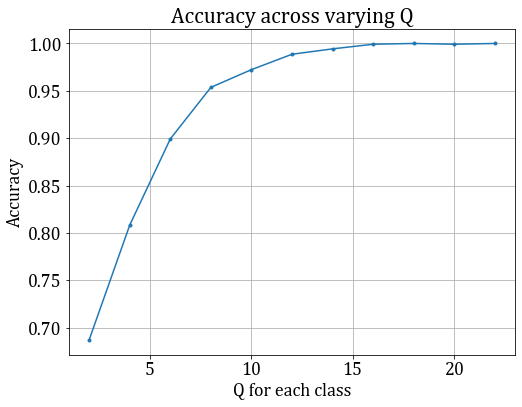

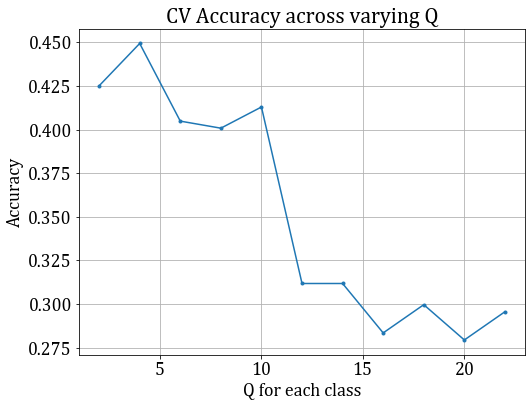

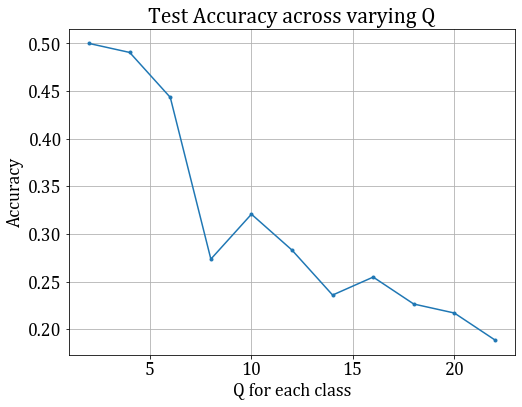

In [8]:
plt.plot(q_list, accuracy_list, '.-')
plt.title("Accuracy across varying Q")
plt.xlabel("Q for each class")
plt.ylabel("Accuracy")
plt.show()

plt.plot(q_list, cv_accuracy_list, '.-')
plt.title("CV Accuracy across varying Q")
plt.xlabel("Q for each class")
plt.ylabel("Accuracy")
plt.show()

plt.plot(q_list, test_accuracy_list, '.-')
plt.title("Test Accuracy across varying Q")
plt.xlabel("Q for each class")
plt.ylabel("Accuracy")
plt.show()

In [13]:
acc = pd.DataFrame([q_list, accuracy_list, cv_accuracy_list, test_accuracy_list]).T
acc = acc.rename(columns={0:"Q", 1:"Accuracy", 2:"CV Accuracy", 3:"Test Accuracy"})
acc = acc.sort_values(by=["CV Accuracy"], ascending=False)
acc

,Q,Accuracy,CV Accuracy,Test Accuracy
1,4.0,0.808130,0.449393,0.490566
0,2.0,0.686992,0.425101,0.500000
4,10.0,0.972358,0.412955,0.320755
2,6.0,0.899187,0.404858,0.443396
3,8.0,0.953659,0.400810,0.273585
5,12.0,0.988618,0.311741,0.283019
6,14.0,0.994309,0.311741,0.235849
8,18.0,1.000000,0.299595,0.226415
10,22.0,1.000000,0.295547,0.188679
7,16.0,0.999187,0.283401,0.254717


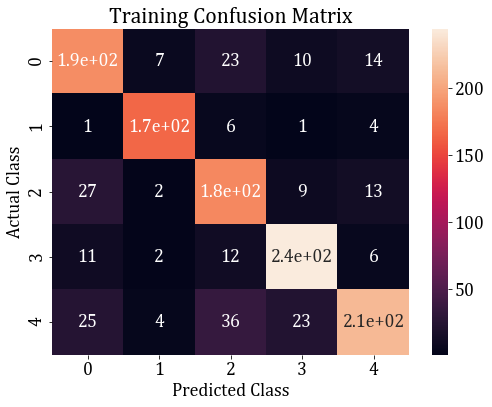

/home/sowmya/Desktop/cs5691/assignment/assignment2/codes/gmm.py:135: RuntimeWarning: divide by zero encountered in log
  lk[i] = np.log(val)


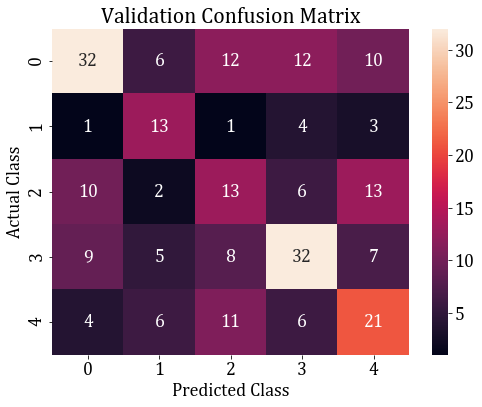

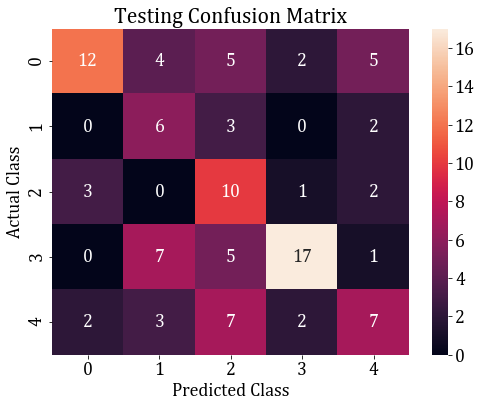

In [10]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

best_model = np.argmax(acc["CV Accuracy"])

gmm0 = gmm_list[0][best_model]
gmm1 = gmm_list[1][best_model]
gmm2 = gmm_list[2][best_model]
gmm3 = gmm_list[3][best_model]
gmm4 = gmm_list[4][best_model]

# Training
a = gmm0.indv_log_likelihood(X)
b = gmm1.indv_log_likelihood(X)
c = gmm2.indv_log_likelihood(X)
d = gmm3.indv_log_likelihood(X)
e = gmm4.indv_log_likelihood(X)

f = np.hstack((a, b, c, d, e))
pred = np.argmax(f, axis=1)
conf_mat = confusion_matrix(pred, df["class"])
plt.figure()
sns.heatmap(conf_mat, annot=True)
plt.title("Training Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

# CV
a = gmm0.indv_log_likelihood(X_cv)
b = gmm1.indv_log_likelihood(X_cv)
c = gmm2.indv_log_likelihood(X_cv)
d = gmm3.indv_log_likelihood(X_cv)
e = gmm4.indv_log_likelihood(X_cv)

f = np.hstack((a, b, c, d, e))
pred = np.argmax(f, axis=1)
conf_mat = confusion_matrix(pred, df_cv["class"])
plt.figure()
sns.heatmap(conf_mat, annot=True)
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

# Testing
a_test = gmm0.indv_log_likelihood(X_test)
b_test = gmm1.indv_log_likelihood(X_test)
c_test = gmm2.indv_log_likelihood(X_test)
d_test = gmm3.indv_log_likelihood(X_test)
e_test = gmm4.indv_log_likelihood(X_test)

f_test = np.hstack((a_test, b_test, c_test, d_test, e_test))
pred_test = np.argmax(f_test, axis=1)
conf_mat = confusion_matrix(pred_test, df_test["class"])
plt.figure()
sns.heatmap(conf_mat, annot=True)
plt.title("Testing Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()